In [ ]:
pip install kaleido

In [ ]:
pip install python-multipart

In [ ]:
pip install fastapi

In [ ]:

pip install uvicorn

In [ ]:
pip install roboflow

In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="MaXSsjPsJ1tghm68R4jI")
project = rf.workspace("road-guard").project("road-sign-detector-jpryp")
dataset = project.version(20).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.14, to fix: `pip install ultralytics==8.0.196`


In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.0/715.0 kB 14.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
model = YOLO('yolov8n.pt')

model.train(data = '/content/Road-Sign-Detector-7/data.yaml',
            epochs = 20,
            imgsz = 640,
            seed = 42,
            batch = 8,
            workers = 4)

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Road-Sign-Detector-7/data.yaml, epochs=20, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, ker

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79cfb3a39600>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.0

In [ ]:
model = YOLO('runs/detect/train2/weights/best.pt')

In [ ]:
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010913 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/Road-Sign-Detector-7/test/labels... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:00<00:00, 894.78it/s] 
val: New cache created: /content/Road-Sign-Detector-7/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.62it/s]
                   all        186        188      0.899      0.896      0.922       0.71
              give_way        186         15      0.924          1      0.991      0.741
                  hump        186         11      0.901          1      0.912       0.65
       left_right_lane        186          5          1          1      0.995      0.896
           narrow_road        186          5      0.833          1      0.995      0.684
           no_stopping       

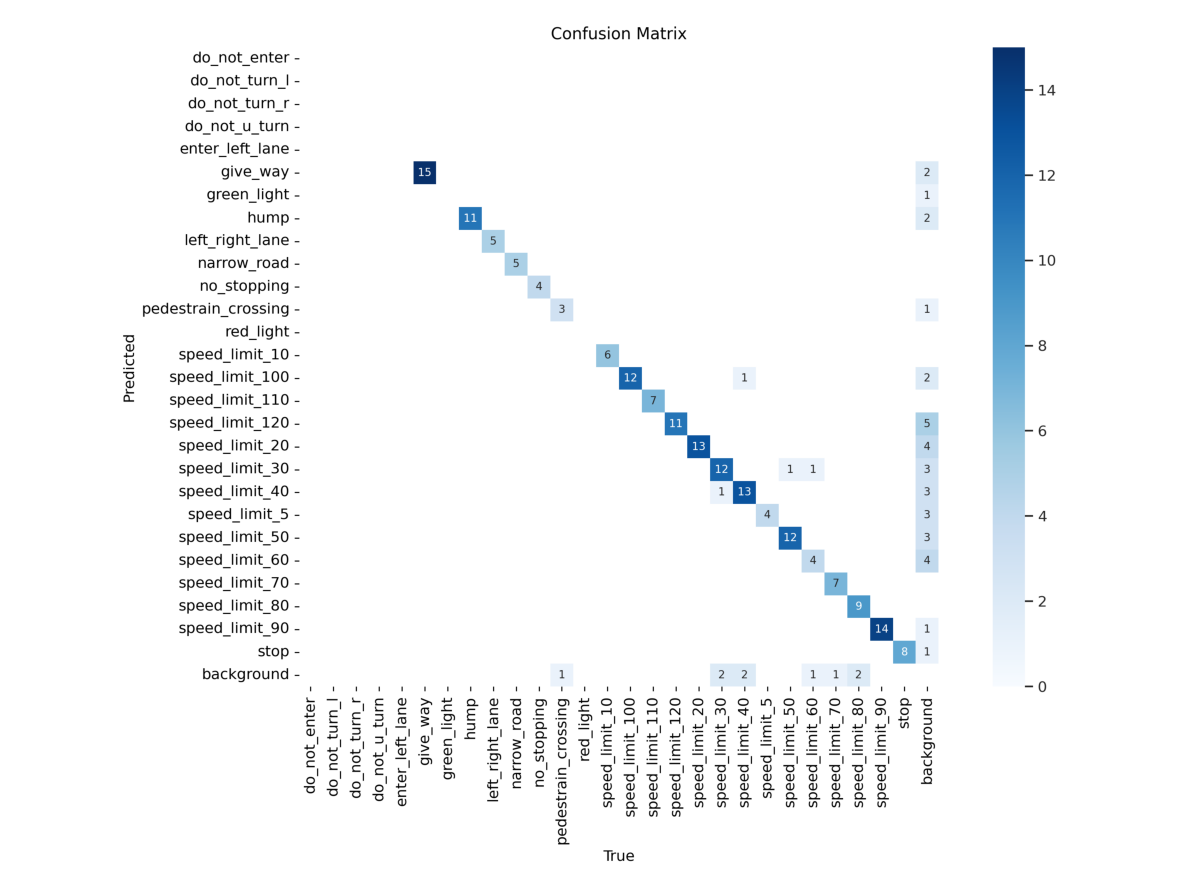

In [ ]:
img = mpimg.imread('runs/detect/val/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [ ]:
def detect_objs(img_path):

    img = cv2.imread(img_path)

    detect_result = model(img)

    detect_img = detect_result[0].plot()

    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 640x640 1 speed_limit_50, 27.1ms
Speed: 2.3ms preprocess, 27.1ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 enter_left_lane, 28.4ms
Speed: 1.9ms preprocess, 28.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 speed_limit_40, 27.4ms
Speed: 2.2ms preprocess, 27.4ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 red_lights, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 give_way, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 speed_limit_50, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 speed_limit_100, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 speed_limit_5s, 11.5ms
Speed: 1.9ms preprocess, 11.5ms i

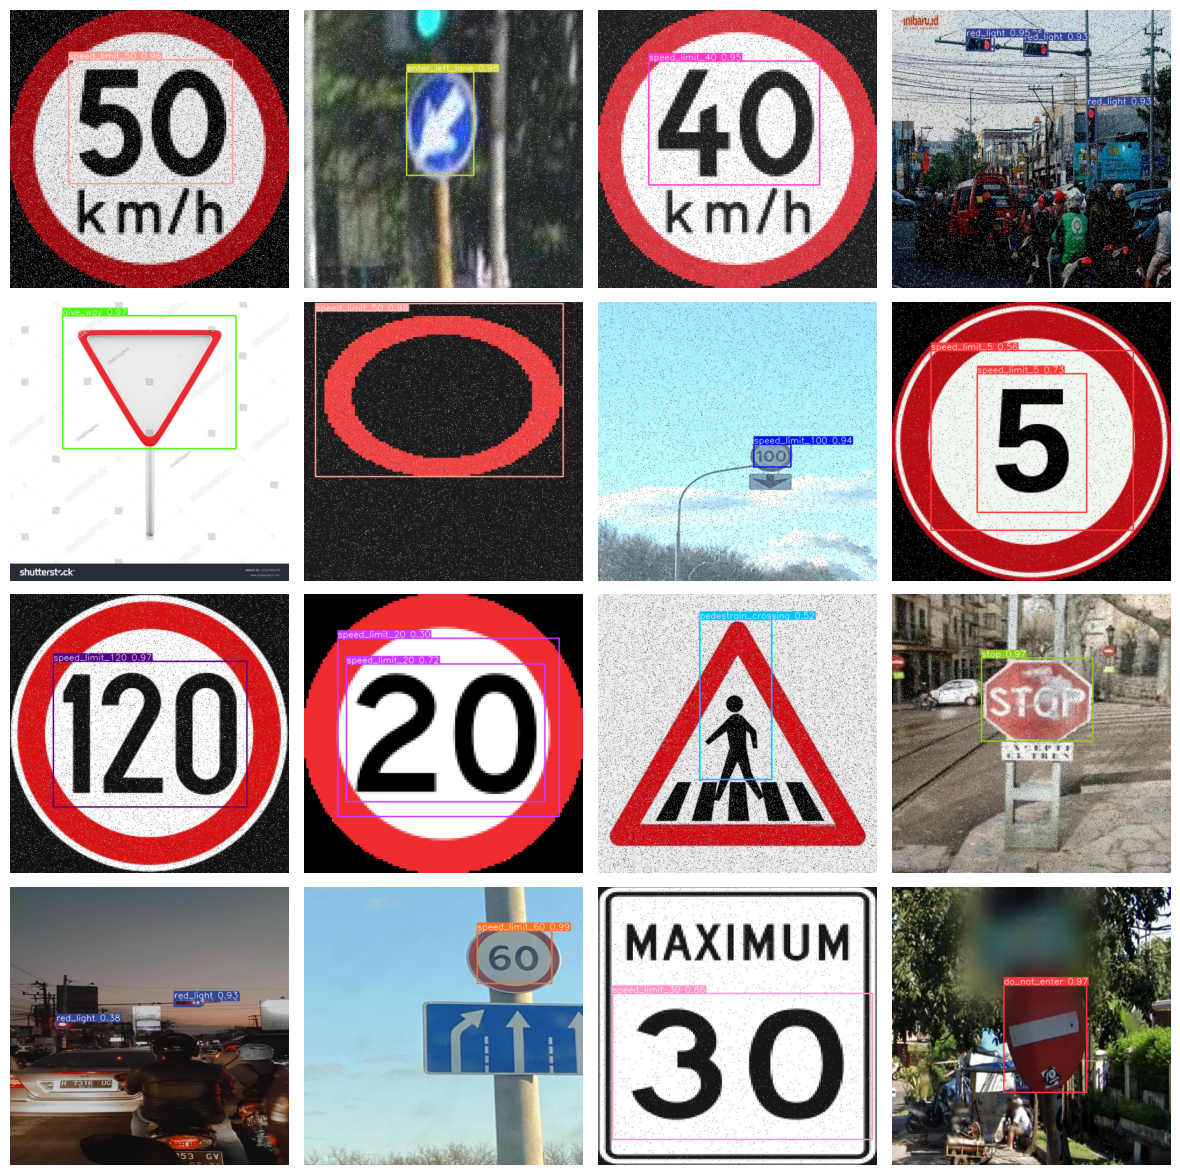

In [ ]:
import random

custom_image_dir = '/content/Road-Sign-Detector-7/train/images'

image_files = os.listdir(custom_image_dir)

selected_images = random.sample(image_files, 16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

for i, img_file in enumerate(selected_images):

    row_idx = i // 4
    col_idx = i % 4

    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = detect_objs(img_path)

    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)